# Prediction Churn Model for a Bank

**Task : Build an end-to-end churn prediction model. Churn prediction is one of the most well known applications of machine learning and data science in the Customer Relationship Management (CRM) and Marketing fields. Simply put, a churner is a user or customer that stops using a company's products or services.**

**In this notebook, we are trying to find a good prediction model to help bank to know before hand the possibility of a customer leaving their bank. In order to do that we need to follow few steps.**

**1- Load Dataset and fix any data issues.**

**2- Load necessary features in training set to train the model.**

**3- Compare few ML model's outcomes and finalize one good model.**

### Let's start the Process

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


** Load the file **

** Dataset Source: https://www.superdatascience.com/machine-learning/  **

In [2]:
bank = pd.read_csv('Churn_Modelling.csv')

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Looks like, no data is missing**

## Exploratory Data Analysis

In [5]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

** Only Gender and Geography are two columns needs to be converted in numeric form, before starting the training process. **

In [6]:
bank['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
bank['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
bank.iloc[:, 3:13].head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


## Correlation

In [9]:
bank.corr()[10:13]

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.04782,-0.007138,-0.156128,0.012097,1.0


#### This shows Age and Balance has much bigger impact on churning

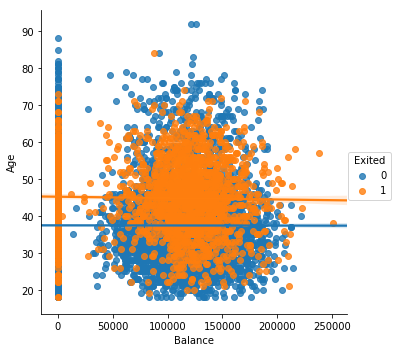

In [10]:
sns.lmplot(x="Balance", y="Age", hue="Exited", data=bank )

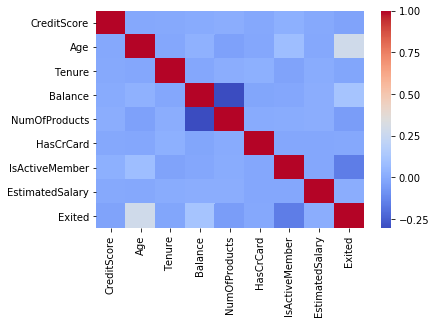

In [25]:
sns.heatmap(bank[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                  'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), cmap='coolwarm')

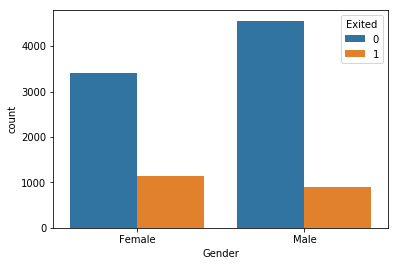

In [26]:
sns.countplot(x='Gender',data=bank, hue='Exited')

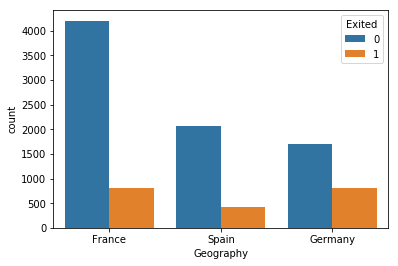

In [27]:
sns.countplot(x='Geography',data=bank, hue='Exited')

### Let's Start spliting our dataset into Training Data

In [28]:
X = bank.iloc[:, 3:13].values
y = bank.iloc[:, 13].values

In [29]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [30]:
y

array([1, 0, 1, ..., 1, 1, 0])

**Let's encode Gender Column in numeric using LabelEncoder**

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

**Let's encode Geography Column in numeric using LabelEncoder**

In [32]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [33]:
# To ignore the warning, printing on this notebook
import warnings
warnings.filterwarnings("ignore")

In [34]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

**Let's use OneHotEncoder**

In [35]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [36]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1975
           1       0.22      0.01      0.01       525

   micro avg       0.79      0.79      0.79      2500
   macro avg       0.51      0.50      0.45      2500
weighted avg       0.67      0.79      0.70      2500

[[1961   14]
 [ 521    4]]
   TN    FP
   FN    TP
Accuracy Score : 0.786
F Score 0.009442870632672334


#### This model has 78% Accuracy, but very low F-score which means very low recall score. Not an ideal model to consider for this problem.

## Decision Tree Model


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1975
           1       0.48      0.51      0.50       525

   micro avg       0.78      0.78      0.78      2500
   macro avg       0.67      0.68      0.68      2500
weighted avg       0.79      0.78      0.78      2500

[[1683  292]
 [ 256  269]]
   TN    FP
   FN    TP
Accuracy Score : 0.7808
F Score 0.5054490792934987


#### This model has 78% Accuracy and 50% F-score. Also 51% recall score for Positive cases of Exited. We can consider this model if no other model perform better than this.

### Let's try few more ML Model

## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=101)
grad.fit(X_train,y_train)
predictions = grad.predict(X_test)

In [49]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.80      0.50      0.62       525

   micro avg       0.87      0.87      0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1908   67]
 [ 261  264]]
   TN    FP
   FN    TP
Accuracy Score : 0.8688
F Score 0.5429864253393666


#### This model is as good as previous one. 

## K-Nearest Neighbours

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [63]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1975
           1       0.21      0.21      0.21       525

   micro avg       0.67      0.67      0.67      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.67      0.67      0.67      2500

[[1575  400]
 [ 417  108]]
   TN    FP
   FN    TP
Accuracy Score : 0.6732
F Score 0.2070552147239264


#### Not Suited for this problem

## Support Vector Machine

In [64]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1975
           1       0.00      0.00      0.00       525

   micro avg       0.79      0.79      0.79      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.62      0.79      0.70      2500

[[1975    0]
 [ 525    0]]
   TN    FP
   FN    TP
Accuracy Score : 0.79
F Score 0.0


#### Recall Score is Zero, which means it has 0% chance to predict True positive cases for churning model.

## Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [67]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1975
           1       0.31      0.06      0.10       525

   micro avg       0.77      0.77      0.77      2500
   macro avg       0.55      0.51      0.49      2500
weighted avg       0.69      0.77      0.71      2500

[[1900   75]
 [ 492   33]]
   TN    FP
   FN    TP
Accuracy Score : 0.7732
F Score 0.07472826086956522


#### Again very low Fscore and Recall score for True positive cases. Can not consider this model.

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.80      0.51      0.62       525

   micro avg       0.87      0.87      0.87      2500
   macro avg       0.84      0.74      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1907   68]
 [ 258  267]]
   TN    FP
   FN    TP
Accuracy Score : 0.8696
F Score 0.5482546201232033


### This model has 86% Accuracy and 54% F-score. Also 51% recall score for True Positive cases, which means it could identify 51% people who might leave the bank. Let's stop here and consider Random Forest Model as our final model.